In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential, Model
from keras.layers import Input, Dense
from keras.utils import to_categorical 

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

df = pd.read_csv('datamahasiswa2015.csv')
df.head()

Using TensorFlow backend.


,No,NIM,OOP,RPB,RPL,PI,APSI,WEB,Statistik,Matdis,...,Desjar,KSI,Pilihan 1,Peminatan,MP1,MP2,MP3,Status,Tanggal Lulus,Keterangan
0,1,1202150001,2.0,3.5,0.0,3.5,3.0,3.0,2.0,2.0,...,3.5,2.0,TECHNO,TECHNO,3.5,3.0,3.0,GRADUATED,30/08/19,TEPAT WAKTU
1,2,1202150002,3.0,3.5,3.5,4.0,3.0,3.0,3.5,3.5,...,3.5,3.5,ERP,ERP,4.0,4.0,3.5,GRADUATED,10/07/19,TEPAT WAKTU
2,3,1202150003,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,OUT,OUT,0.0,0.0,0.0,RESIGN,OUT,TIDAK TEPAT WAKTU
3,4,1202150004,3.5,4.0,3.5,4.0,3.5,4.0,3.5,3.5,...,4.0,4.0,EAD,EAD,3.5,4.0,2.0,GRADUATED,05/07/19,TEPAT WAKTU
4,5,1202150005,2.0,2.5,2.0,1.0,3.5,1.0,2.0,1.0,...,2.0,1.0,OUT,OUT,0.0,0.0,0.0,STUDENT,OUT,TIDAK TEPAT WAKTU


In [2]:
new_class = [0] * len(df['Keterangan'])
for index, row in df.iterrows() :
    if row['Keterangan'] == "TEPAT WAKTU" :
        new_class[index] = 1
    else :
        new_class[index] = 0

In [3]:
df["ket_status"] = new_class
df.head()

,No,NIM,OOP,RPB,RPL,PI,APSI,WEB,Statistik,Matdis,...,KSI,Pilihan 1,Peminatan,MP1,MP2,MP3,Status,Tanggal Lulus,Keterangan,ket_status
0,1,1202150001,2.0,3.5,0.0,3.5,3.0,3.0,2.0,2.0,...,2.0,TECHNO,TECHNO,3.5,3.0,3.0,GRADUATED,30/08/19,TEPAT WAKTU,1
1,2,1202150002,3.0,3.5,3.5,4.0,3.0,3.0,3.5,3.5,...,3.5,ERP,ERP,4.0,4.0,3.5,GRADUATED,10/07/19,TEPAT WAKTU,1
2,3,1202150003,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,OUT,OUT,0.0,0.0,0.0,RESIGN,OUT,TIDAK TEPAT WAKTU,0
3,4,1202150004,3.5,4.0,3.5,4.0,3.5,4.0,3.5,3.5,...,4.0,EAD,EAD,3.5,4.0,2.0,GRADUATED,05/07/19,TEPAT WAKTU,1
4,5,1202150005,2.0,2.5,2.0,1.0,3.5,1.0,2.0,1.0,...,1.0,OUT,OUT,0.0,0.0,0.0,STUDENT,OUT,TIDAK TEPAT WAKTU,0


In [4]:
mainData = df.drop(['Status','Keterangan','Pilihan 1','Peminatan','Tanggal Lulus','No','NIM','MP1','MP2','MP3','RPL'],axis=1)
mainData.rename(columns={'KSI':'Manprosi'}, inplace=True)
mainData.head()

,OOP,RPB,PI,APSI,WEB,Statistik,Matdis,Alpro,Strukdat,SE,PO,SCM,EA,Basdat,Manjarkom,Sisop,MSDM,Desjar,Manprosi,ket_status
0,2.0,3.5,3.5,3.0,3.0,2.0,2.0,3.0,2.0,3.5,3.5,3.0,3.5,2.0,2.0,2.5,3.5,3.5,2.0,1
1,3.0,3.5,4.0,3.0,3.0,3.5,3.5,3.5,3.0,3.5,4.0,4.0,3.0,3.5,2.5,3.5,3.5,3.5,3.5,1
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
3,3.5,4.0,4.0,3.5,4.0,3.5,3.5,3.5,4.0,3.0,4.0,4.0,3.0,3.5,3.5,3.5,3.5,4.0,4.0,1
4,2.0,2.5,1.0,3.5,1.0,2.0,1.0,2.5,0.0,2.5,4.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,1.0,0


In [5]:
target = ["ket_status"]
predictors = list(set(list(mainData.columns))-set(target))
mainData[predictors] = mainData[predictors]/mainData[predictors].max()
mainData[predictors].head()

,EA,OOP,APSI,Basdat,RPB,Sisop,Manjarkom,PO,Desjar,Alpro,PI,SE,Manprosi,Matdis,Statistik,SCM,Strukdat,MSDM,WEB
0,0.875,0.500,0.750,0.500,0.875,0.625,0.500,0.875,0.875,0.750,0.875,0.875,0.500,0.500,0.500,0.75,0.50,0.875,0.75
1,0.750,0.750,0.750,0.875,0.875,0.875,0.625,1.000,0.875,0.875,1.000,0.875,0.875,0.875,0.875,1.00,0.75,0.875,0.75
2,0.000,0.250,0.250,0.000,0.000,0.000,0.000,0.000,0.250,0.000,0.000,0.500,0.000,0.000,0.000,0.00,0.50,0.000,0.00
3,0.750,0.875,0.875,0.875,1.000,0.875,0.875,1.000,1.000,0.875,1.000,0.750,1.000,0.875,0.875,1.00,1.00,0.875,1.00
4,0.500,0.500,0.875,0.250,0.625,0.500,0.500,1.000,0.500,0.625,0.250,0.625,0.250,0.250,0.500,0.50,0.00,0.250,0.25


In [6]:
X = mainData[target]
y = mainData[predictors]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=40)
print(X_train.shape)
print(y_train.shape)
print(X_test.head())
print(y_test.shape)

(259, 1)
(259, 19)
     ket_status
263           1
314           1
296           0
26            1
185           1
(111, 19)


In [7]:
# y_train = to_categorical(y_train)
# y_test = to_categorical(y_test)

X_trains = to_categorical(X_train)
X_tests = to_categorical(X_test)

print(X_trains.shape)

(259, 2)


In [8]:
model = Sequential()
model.add(Dense(128, activation='relu', input_dim=19))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [9]:
model.fit(y_train, X_trains, epochs=200)

Epoch 1/200
259/259 [==============================] - 0s 450us/step - loss: 0.6236 - accuracy: 0.6448
Epoch 2/200
259/259 [==============================] - 0s 50us/step - loss: 0.4846 - accuracy: 0.7568
Epoch 3/200
259/259 [==============================] - 0s 54us/step - loss: 0.4351 - accuracy: 0.8031
Epoch 4/200
259/259 [==============================] - 0s 77us/step - loss: 0.4181 - accuracy: 0.8494
Epoch 5/200
259/259 [==============================] - 0s 81us/step - loss: 0.3937 - accuracy: 0.8340
Epoch 6/200
259/259 [==============================] - 0s 62us/step - loss: 0.3561 - accuracy: 0.8649
Epoch 7/200
259/259 [==============================] - 0s 58us/step - loss: 0.3563 - accuracy: 0.8803
Epoch 8/200
259/259 [==============================] - 0s 58us/step - loss: 0.3333 - accuracy: 0.8649
Epoch 9/200
259/259 [==============================] - 0s 46us/step - loss: 0.3116 - accuracy: 0.8726
Epoch 10/200
259/259 [==============================] - 0s 54us/step - loss: 0.29

In [11]:
pred_train= model.predict(y_train)
scores = model.evaluate(y_train, X_trains, verbose=0)
print('Accuracy on training data: {}% \n Error on training data: {}'.format(scores[1], 1 - scores[1]))   
 
pred_test= model.predict(y_test)
scores2 = model.evaluate(y_test, X_tests, verbose=0)
print('Accuracy on test data: {}% \n Error on test data: {}'.format(scores2[1], 1 - scores2[1]))    

Accuracy on training data: 0.9845559597015381% 
 Error on training data: 0.015444040298461914
Accuracy on test data: 0.8468468189239502% 
 Error on test data: 0.1531531810760498


In [12]:
hasil = pd.DataFrame()
hasil["NIM"] = df["NIM"]
hasil["ket_status"] = df["ket_status"]
temp = model.predict_classes(y_test)

# hasil = model.predict_classes(y_test)

In [13]:
pre = [0] * len(hasil)
for index, row in hasil.iterrows():
    if (index in y_test.index) :
        pre[index] = 1
    else :
        pre[index] = "train data"
        
hasil["forecast"] = pre
hasil.head()


,NIM,ket_status,forecast
0,1202150001,1,1
1,1202150002,1,train data
2,1202150003,0,train data
3,1202150004,1,1
4,1202150005,0,1


In [20]:
dataTesting = pd.read_excel('Nilai Master Pipe.xlsx')
dataTesting.head()

,nim,nama,OOP,RPB,PI,APSI,WEB,Statistik,Matdis,Alpro,...,SE,PO,SCM,EA,Basdat,Manjarkom,Sisop,MSDM,Desjar,Manprosi
0,1202170006,SHINTA EKA RISA SINURAYA,4.0,3.5,2.0,2.0,3.5,4.0,2.5,3.5,...,4.0,3.0,3.0,3.0,3.0,3.0,3.0,3.5,3.5,2.5
1,1202170010,COKORDA AGUNG JAYA LAKSMANA PRAKASA,4.0,3.5,4.0,2.5,4.0,3.0,4.0,3.0,...,4.0,3.5,3.0,3.5,3.5,3.5,3.0,3.5,3.5,3.0
2,1202170011,RAFIF FAKHRI RAMADHAN,4.0,3.0,3.5,2.0,3.5,3.5,3.5,3.5,...,4.0,3.5,3.5,3.5,4.0,3.5,3.0,4.0,3.5,3.0
3,1202170015,M IKHSAN PRATAMA P,4.0,3.5,3.5,3.5,3.5,3.5,3.5,4.0,...,3.5,2.5,3.5,3.0,3.5,3.0,3.5,3.5,3.5,2.5
4,1202170018,DINDA SONIA TIARA,2.0,2.5,3.0,3.5,3.5,2.5,2.5,3.0,...,3.5,3.5,2.5,3.5,3.0,2.5,3.0,3.5,2.0,3.5


In [21]:
dataTestingFilter = dataTesting[predictors]
dataTestingHasil = model.predict_classes(dataTestingFilter)

dataTesting["Lulus Tepat Waktu"] = dataTestingHasil
dataTesting.rename(columns={'nim':'NIM'}, inplace=True)
dataTesting.drop(columns="nama",axis=1).head()

,NIM,OOP,RPB,PI,APSI,WEB,Statistik,Matdis,Alpro,Strukdat,...,PO,SCM,EA,Basdat,Manjarkom,Sisop,MSDM,Desjar,Manprosi,Lulus Tepat Waktu
0,1202170006,4.0,3.5,2.0,2.0,3.5,4.0,2.5,3.5,2.5,...,3.0,3.0,3.0,3.0,3.0,3.0,3.5,3.5,2.5,1
1,1202170010,4.0,3.5,4.0,2.5,4.0,3.0,4.0,3.0,4.0,...,3.5,3.0,3.5,3.5,3.5,3.0,3.5,3.5,3.0,1
2,1202170011,4.0,3.0,3.5,2.0,3.5,3.5,3.5,3.5,4.0,...,3.5,3.5,3.5,4.0,3.5,3.0,4.0,3.5,3.0,1
3,1202170015,4.0,3.5,3.5,3.5,3.5,3.5,3.5,4.0,4.0,...,2.5,3.5,3.0,3.5,3.0,3.5,3.5,3.5,2.5,1
4,1202170018,2.0,2.5,3.0,3.5,3.5,2.5,2.5,3.0,3.5,...,3.5,2.5,3.5,3.0,2.5,3.0,3.5,2.0,3.5,1


In [22]:
pred_test= model.predict(dataTestingFilter)
print('Accuracy on test data: {}% \n Error on test data: {}'.format(scores2[1], 1 - scores2[1]))
# dataTesting.to_csv('2016-forecast-cnn.csv')

Accuracy on test data: 0.8468468189239502% 
 Error on test data: 0.1531531810760498


In [19]:
dataPeminatan = pd.read_csv('peminatan2017.csv')
dataPeminatan.head()

,Unnamed: 0,NIM,Technopreneur,EAD,ERP,EDM,EA,ISM,EIM,Peminatan,Keterangan
0,0,1202170006,1,1,1,1,1,1,1,ISM,Cocok
1,1,1202170010,1,1,1,1,1,1,1,EAD,Cocok
2,2,1202170011,1,1,1,1,1,1,1,ISM,Cocok
3,3,1202170015,1,1,1,1,1,1,1,EDM,Cocok
4,4,1202170018,1,1,1,1,1,1,1,EA,Cocok


In [20]:
dataFix = pd.DataFrame()
dataFix["NIM"] = dataTesting["NIM"]
dataFix["Status Lulus"] = dataTesting["Lulus Tepat Waktu"]
dataFix["Peminatan"] = dataPeminatan["Peminatan"]
dataFix.head()

,NIM,Status Lulus,Peminatan
0,1202170006,0,ISM
1,1202170010,1,EAD
2,1202170011,1,ISM
3,1202170015,1,EDM
4,1202170018,1,EA


In [39]:
countLulus = 0
countTidakLulus = 0

keterangan_lulus = [0]*len(dataFix)
for index, row in dataFix.iterrows() :
    if row["Status Lulus"] == 1 :
        keterangan_lulus = "Tepat Waktu"
        countLulus = countLulus + 1
    else :
        keterangan_lulus = "Tidak Tepat Waktu"
        countTidakLulus = countTidakLulus + 1
        
dataFix["Peramalan Lulus"] = keterangan_lulus
dataFix.head()

,NIM,Status Lulus,Peminatan,Peramalan Lulus
0,1202170006,0,ISM,Tidak Tepat Waktu
1,1202170010,1,EAD,Tidak Tepat Waktu
2,1202170011,1,ISM,Tidak Tepat Waktu
3,1202170015,1,EDM,Tidak Tepat Waktu
4,1202170018,1,EA,Tidak Tepat Waktu


In [22]:
def presentase(peminatan, data, status) :
    count = 0
    for index, row in data.iterrows() :
        if row["Peminatan"] == peminatan :
            if row["Status Lulus"] == status : 
                count = count + 1 
    return count

In [23]:
totalForecast = pd.DataFrame({
    "Keterangan" : ["Tepat Waktu","Tidak Tepat Waktu"],
    "Jumlah" : [countLulus,countTidakLulus]
})

totalForecast

,Keterangan,Jumlah
0,Tepat Waktu,305
1,Tidak Tepat Waktu,69


In [40]:
edm0 = presentase("EDM",dataFix,0)
edm1 = presentase("EDM",dataFix,1)
techno0 = presentase("TECHNO",dataFix,0)
techno1 = presentase("TECHNO",dataFix,1)
ead0 = presentase("EAD",dataFix,0)
ead1 = presentase("EAD",dataFix,1)
ea0 = presentase("EA",dataFix,0)
ea1 = presentase("EA",dataFix,1)
ism0 = presentase("ISM",dataFix,0)
ism1 = presentase("ISM",dataFix,1)
eim0 = presentase("EIM",dataFix,0)
eim1 = presentase("EIM",dataFix,1)
erp0 = presentase("ERP",dataFix,0)
erp1 = presentase("ERP",dataFix,1)

In [42]:
df_peminatan = pd.DataFrame({
    "Peminatan" : ["Techno","EDM","EAD","EA","ISM","EIM","ERP"],
    "Lulus Tepat Waktu" : [techno1,edm1,ead1,ea1,ism1,eim1,erp1],
    "Lulus Tidak Tepat Waktu" : [techno0,edm0,ead0,ea0,ism0,eim0,erp0]
})

df_peminatan

,Peminatan,Lulus Tepat Waktu,Lulus Tidak Tepat Waktu
0,Techno,28,8
1,EDM,56,11
2,EAD,66,13
3,EA,34,5
4,ISM,44,10
5,EIM,33,9
6,ERP,37,2


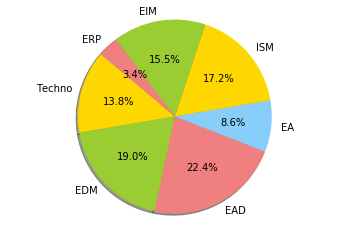

,Keterangan,Jumlah
0,Tepat Waktu,305
1,Tidak Tepat Waktu,69


In [48]:
# Data to plot tidak lulus tepat waktu
labels = 'Techno', 'EDM', 'EAD', 'EA', 'ISM', 'EIM', 'ERP'
sizes = [techno0,edm0,ead0,ea0,ism0,eim0,erp0]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue','gold', 'yellowgreen', 'lightcoral']
explode = (0, 0, 0, 0, 0, 0, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

totalForecast

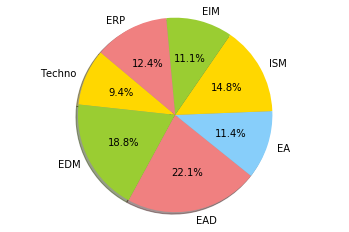

,Keterangan,Jumlah
0,Tepat Waktu,305
1,Tidak Tepat Waktu,69


In [49]:
# Data to plot lulus tepat waktu
labels = 'Techno', 'EDM', 'EAD', 'EA', 'ISM', 'EIM', 'ERP'
sizes = [techno1,edm1,ead1,ea1,ism1,eim1,erp1]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue','gold', 'yellowgreen', 'lightcoral']
explode = (0, 0, 0, 0, 0, 0, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

totalForecast